# Introdução à Biblioteca Pandas

## O que é e Para Que Serve?

pandas é uma **biblioteca de *software*** escrita na linguagem de programação Python para **manipulação e análise de dados**.

**Em particular**, ela oferece estruturas de dados e operações para manipulação de:

+ **Séries de dados;**
+ **Tabelas de dados.**

O pandas **faz uso intensivo da biblioteca NumPy** (outra biblioteca de Python, esta para manipulação de Álgebra Linear) para otimizar suas tratativas de dados. Na verdade, pode-se dizer que o pandas é feito quase que em cima do NumPy. Se você gosta de entender mais à fundo as estruturas computacionais, procure estudar também a biblioteca NumPy (além de ajudar muito nos "bastidores" do pandas, é a biblioteca base para muitas das técnicas de *Machine Learning*).

Seu desenvolvimento se iniciou em 2008, internamente à **AQR Capital Management**, uma empresa de investimentos global. 

Depois, passou a ser um *software* livre, cuja curadoria é centralizada no projeto **pydata** (https://pydata.org/about/), um braço educacional do grupo **NumFOCUS**, que por sua vez é uma comunidade de desenvolvedores que promovem a computação livre.

O site do pandas, com toda sua documentação é: https://pandas.pydata.org/

O logo atual do pandas é o abaixo:

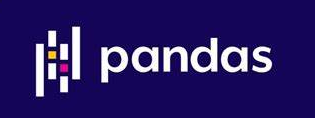

In [68]:
from IPython.display import Image
Image("pandas_logo.png")

## O Nome

O nome é derivado da expressão ***panel data* (dados de painel)**, que é como os estatísticos chamam dados compostos por observações de um mesmo indivíduo em multiplos períodos de tempo.

Obs: Apesar de ter sido iniciada com dados de painel, a biblioteca não se limita a esta estrutura de dados apenas. Hoje trabalha com **séries (*series*)** e **tabelas (*dataframes*)** em geral.

Muitos associam a biblioteca ao urso panda, por motivos óbvios. Mas agora você sabe que não tem nada a ver.

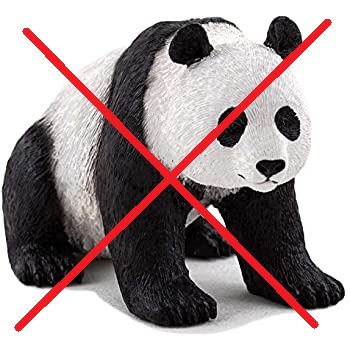

In [69]:
from IPython.display import Image
Image("pandas_isNotAboutTheBear.png")

Mesmo não tendo nada a ver com o urso, muitos desenvolvedores adotaram o urso panda como um mascote não oficial da biblioteca. Eu mesmo gosto da ideia.

## Importação

Para ser usada, basta ser importada pelo comando abaixo. Usualmente, utilita-se o apelido **pd** para um código mais enxuto.

In [70]:
import pandas as pd

# Série de dados (*series*)

## O Que É

Uma série (*series*) de dados **é um *array* (uma matriz n-dimensional que pode alocar dados de qualquer tipo) unidimensional, em que os dados tem etiquetas (*labels*) posicionadas como índices**.

## Criando do Zero

Seja um conjunto de preços de ações de algumas *microcaps* (Anima, Camil, Hering e Movida), dispostos em forma de série (*series*), com as etiquetas (*labels*) sendo os *tickers* correspondentes:

+ ANIM3: 29.03 (BRL)
+ CAML3: 13.36 (BRL)
+ HGTX3: 17.89 (BRL)
+ MOVI3: 16.93 (BRL)

Pode-se construir um objeto série (*series*) através do método Series do pandas, passando os valores como argumentos:

In [71]:
microcap_prices = pd.Series([29.03, 13.36, 17.89, 16.93])

In [72]:
microcap_prices
# Repare que a estrutura resultante são os valores em forma de array unidimensional, referenciados por índices 
# criados automaticamente (numéricos, no caso, sendo 0, 1, ...).

0    29.03
1    13.36
2    17.89
3    16.93
dtype: float64

In [73]:
# Repare que o tipo do objeto é uma série do pandas.
type(microcap_prices)

pandas.core.series.Series

Mas a estrutura acima ainda não está legal, pois não diferencia os valores como pertencendo a cada uma das empresas do exemplo. Então vamos recriar a série, mas agora passando a lista de empresas como sendo os índices:

In [74]:
microcap_prices = pd.Series([29.03, 13.36, 17.89, 16.93], 
                           index = ['ANIM3', 'CAML3', 'HGTX3', 'MOVI3'])

In [75]:
microcap_prices

ANIM3    29.03
CAML3    13.36
HGTX3    17.89
MOVI3    16.93
dtype: float64

## Acessando Valores

Os índices servem para referenciar os valores.

No caso acima, pode-se selecionar um valor em específico, usando os colchetes e passando o índice correspondente (um *ticker*, no caso):

In [76]:
microcap_prices['ANIM3']
# Usado desta forma, existe grande similaridade de séries com dicionários.

29.03

In [77]:
# Mas os valores também podem ser acessados com índice posicional (numérico). 
# Por exemplo, o valor 29.03 também se encontra na posição 0:
microcap_prices[0]

29.03

Os índices também podem ser acessados, através do atributo index:

In [78]:
microcap_prices.index

Index(['ANIM3', 'CAML3', 'HGTX3', 'MOVI3'], dtype='object')

In [79]:
# Você pode transformar ainda o índice acessado acima em uma lista, para mais fácil manipulação,
# através do uso do método tolist():
microcap_prices.index.tolist()

['ANIM3', 'CAML3', 'HGTX3', 'MOVI3']

## Alterando / Atribuindo Valores

Para alterar um valor da série, basta atribuir o novo valor ao local de referência na série em que se quer substituir o valor:

In [80]:
# Suponha que o valor atual de ANIM3 (29.03) esteja errado, e que o correto seria 29.05.
# Para alterar, fazemos:
microcap_prices['ANIM3'] = 29.05

In [81]:
microcap_prices
# Pronto! O valor foi alterado.

ANIM3    29.05
CAML3    13.36
HGTX3    17.89
MOVI3    16.93
dtype: float64

## Atributos

As séries possuem diversos atributos acessíveis. Aqui listamos alguns dos mais básicos (a lista é enorme). Para outros atributos, acesse a documentação em https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html.

In [82]:
# O atributo values acessa os valores efetivamente.
microcap_prices.values

array([29.05, 13.36, 17.89, 16.93])

In [83]:
# Você pode transformar o output anterior em lista para mais fácil manipulação, se você assim quiser, 
# bastando adicionar o método tolist() na sequência:
microcap_prices.values.tolist()

[29.05, 13.36, 17.89, 16.93]

In [84]:
# Se você quiser saber qual o tipo de dado dos valores armazenados, basta usar o atributo dtypes (de
# data types):
microcap_prices.dtypes

dtype('float64')

In [85]:
# Para descobrir as dimensões do objeto:
microcap_prices.shape
# O objeto apresenta 4 linhas e nenhuma coluna (pois é unidimensional).

(4,)

In [86]:
# Para descobrir o tamanho (a quantidade de elementos) do objeto:
microcap_prices.size
# São 4 elementos.

4

In [87]:
# Para descobrir o número de dimensões do objeto:
microcap_prices.ndim
# O objeto possui uma única dimensão (é unidimensional).

1

## Métodos

As séries possuem vários métodos aplicáveis. Aqui listamos apenas alguns, já que a lista é enorme (para mais detalhes dos métodos aqui apresentados, ou para explorar outros métodos, acesse a documentação em https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).

In [88]:
# Para o cálculo da soma dos valores:
microcap_prices.sum()

77.22999999999999

In [89]:
# Para o cálculo da soma acumulada dos valores:
microcap_prices.cumsum()

ANIM3    29.05
CAML3    42.41
HGTX3    60.30
MOVI3    77.23
dtype: float64

In [90]:
# Para apendar (adicionar) novos elementos de séries (concatenar duas séries):
microcap_prices = microcap_prices.append(microcap_prices)

In [91]:
microcap_prices

ANIM3    29.05
CAML3    13.36
HGTX3    17.89
MOVI3    16.93
ANIM3    29.05
CAML3    13.36
HGTX3    17.89
MOVI3    16.93
dtype: float64

In [92]:
# Para somar valores agrupados pelos índices, usa-se o encadeamento do metodo groupby() (para agrupar, 
# no caso pelos valores de índices) e sum() (para efetuar a agregação).
microcap_prices.groupby(microcap_prices.index).sum()

ANIM3    58.10
CAML3    26.72
HGTX3    35.78
MOVI3    33.86
dtype: float64

In [93]:
# Para um resumo de estatísticas básicas:
microcap_prices.describe()

count     8.0000
mean     19.3075
std       6.2781
min      13.3600
25%      16.0375
50%      17.4100
75%      20.6800
max      29.0500
dtype: float64

## Valores de Série Não Precisam Ser Numéricos

Como dito na enunciação de série, os valores não precisam ser numéricos (como nos exemplos até aqui), mas sim podem ser de qualquer tipo. Segue um exemplo de uma série com valores tipo cadeia de caracteres (*string*):

In [94]:
microcap_names = pd.Series(['Anima', 'Camil', 'Cia Hering', 'Movida'],
                          index = ['ANIM3', 'CAML3', 'HGTX3', 'MOVI3'])

In [95]:
microcap_names

ANIM3         Anima
CAML3         Camil
HGTX3    Cia Hering
MOVI3        Movida
dtype: object

## Série Como Uma Série Temporal

Um objeto de série do pandas pode ser usado para representar uma série temporal, isto é, um conjunto de valores referenciado no tempo. Para isso basta atribuir como índices valores do tipo *date* ou *datetime*.

Tomemos como exemplo os preços de fechamento de ITUB3 (Itaú-Unibanco ON) entre

In [96]:
# Método date da biblioteca datetime, usado para criar valores do tipo date.
from datetime import date

ITUB3_price_series = pd.Series([22.71, 22.47, 22.31, 22.33, 22.01, 21.87, 21.94],
                              index = [date(2020, 9, 14), date(2020, 9, 15), date(2020, 9, 16),
                                      date(2020, 9, 17), date(2020, 9, 18), date(2020, 9, 21),
                                      date(2020, 9, 22)])

In [97]:
ITUB3_price_series

2020-09-14    22.71
2020-09-15    22.47
2020-09-16    22.31
2020-09-17    22.33
2020-09-18    22.01
2020-09-21    21.87
2020-09-22    21.94
dtype: float64

Os valores agora podem ser acessados referenciando uma data:

In [98]:
dt = date(2020, 9, 15)

In [99]:
ITUB3_price_series[dt]

22.47

Alguns métodos específicos de séries temporais estão disponíveis dentre os métodos para séries. 
Por exemplo, médias móveis podem ser obtidas da seguinte forma:

In [100]:
# Usa-se o método rolling com argumento window=2 para criar uma janela móvel de tamanho 2 sobre a série. 
# Em seguida, sob esta estrutura, calcula-se a média para cada uma das possíveis janelas de tamanho 2.
# Assim, obtêm-se a média móvel de dois períodos.
ITUB3_price_series.rolling(window=2).mean()

2020-09-14       NaN
2020-09-15    22.590
2020-09-16    22.390
2020-09-17    22.320
2020-09-18    22.170
2020-09-21    21.940
2020-09-22    21.905
dtype: float64

In [101]:
# Para mais métodos, consultar a documentação.

# Tabela de dados (*dataframe*) 

## O Que É

Tabela (ou *dataframe*) é **um tipo de dado tabular de duas dimensões (linhas e colunas), composto por dados de tipos heterogêneos (cada coluna pode ter um tipo de dados diferente) e de tamanho mutável (linhas ou colunas podem ser adicionadas ou retiradas).**

É a tabela tal qual a conhecemos, tão popularizada pelo *software* Excel e seus assemelhados.

## Criando do Zero

Para criar um *dataframe*, utiliza-se o método construtor DataFrame() do pandas.

No nosso caso, vamos construir uma tabela pequena, com dados de algumas *microcaps*.

Repare que, no código abaixo, estamos passando como *input* um dicionário, cujas chaves são os nomes das colunas e os valores são listas com valores que popularão as linhas da tabela.

In [102]:
microcaps = pd.DataFrame({'name': ['Anima', 'Camil', 'Cia Hering', 'Movida', 'Eucatex'],
                         'class': ['ON', 'ON', 'ON', 'ON', 'PN'],
                         'ticker': ['ANIM3', 'CAML3', 'HGTX3', 'MOVI3', 'EUCA4'],
                         'BOVESPA_segment': ['Novo Mercado', 'Novo Mercado', 'Novo Mercado', 'Novo Mercado', 'Nível 1'],
                         'marketCap': [1521615, 2584400, 5010526, 4173124, 544400],
                         'netProfit_12m': [65200, 379622, 235283, 176433, 64480]})
# O campo class indica se uma ação é Ordinária ou Preferencial, classificações de ações da bolsa brasileira quanto à 
# priorização para recebimento de dividendos.
# O campo BOVESPA_segment traz as classificações quanto a Governança Corporativa.

In [103]:
microcaps
# Repare que as colunas estão nomeadas acima (índice de colunas), e que as linhas possuem um índice numérico 
# (índice de linhas).
# Como estamos tratando de objetos bi-dimensionais, faz sentido pensarmos que precisamos ter índices nas duas
# dimensões (linhas e colunas), para facilitar as buscas.

,name,class,ticker,BOVESPA_segment,marketCap,netProfit_12m
0,Anima,ON,ANIM3,Novo Mercado,1521615,65200
1,Camil,ON,CAML3,Novo Mercado,2584400,379622
2,Cia Hering,ON,HGTX3,Novo Mercado,5010526,235283
3,Movida,ON,MOVI3,Novo Mercado,4173124,176433
4,Eucatex,PN,EUCA4,Nível 1,544400,64480


In [104]:
type(microcaps)
# Repare que o tipo do dado é um DataFrame do pandas.

pandas.core.frame.DataFrame

## Acessando Valores

### Por Índices

Selecionando linhas:

In [105]:
# Para uma única linha, basta referenciar o índice da linha como argumento no método iloc() (de index location).
# Para selecionarmos a linha 0:
microcaps.iloc[0]

name                      Anima
class                        ON
ticker                    ANIM3
BOVESPA_segment    Novo Mercado
marketCap               1521615
netProfit_12m             65200
Name: 0, dtype: object

In [106]:
# Se quiser fatiar (slice) o dataframe acessando uma faixa de linhas, basta referenciar entre colchetes os 
# índices das linhas.
# O exemplo abaixo mostra como acessar todas as linhas no intervalo que inicia em 1 (incluso ele) e vai até
# o final.
microcaps[1:]

,name,class,ticker,BOVESPA_segment,marketCap,netProfit_12m
1,Camil,ON,CAML3,Novo Mercado,2584400,379622
2,Cia Hering,ON,HGTX3,Novo Mercado,5010526,235283
3,Movida,ON,MOVI3,Novo Mercado,4173124,176433
4,Eucatex,PN,EUCA4,Nível 1,544400,64480


In [107]:
# O exemplo abaixo mostra como acessar todas as linhas no intervalo que inicia em 2 (incluso ele) e vai até
# a linha de índice 3 (a linha de índice 4 é excluída porque no Python, você já sabe, o fim do intervalo é
# exclusivo (aberto).
microcaps[2:4]

,name,class,ticker,BOVESPA_segment,marketCap,netProfit_12m
2,Cia Hering,ON,HGTX3,Novo Mercado,5010526,235283
3,Movida,ON,MOVI3,Novo Mercado,4173124,176433


Agora, se, por algum motivo, você queira acessar uma coluna inteira, existem duas maneiras:

In [108]:
# Uma é com o nome do dataframe seguido dos colchetes com o nome da coluna:
microcaps['name']
# Repare que como a saída é unidimensional, o output já sai como uma série, que é o tipo de objeto unidimensional
# do pandas.

0         Anima
1         Camil
2    Cia Hering
3        Movida
4       Eucatex
Name: name, dtype: object

In [109]:
# A outra é fazendo o acesso seguindo o padrão <objeto>.<atributo>, já que as colunas são consideradas 
# atributos do dataframe:
microcaps.name
# Repare que como a saída é unidimensional, o output já sai como uma série, que é o tipo de objeto unidimensional
# do pandas.

0         Anima
1         Camil
2    Cia Hering
3        Movida
4       Eucatex
Name: name, dtype: object

Mas devemos lembrar que um *dataframe* é um objeto bidimensional, e que, assim sendo, possui dois índices, um para cada dimensão (linhas e colunas). Sendo assim, podemos fazer seleções considerando conjuntamente linhas e colunas!

Assim, podemos fazer a seleção (*subset*) parcial considerando apenas parte das linhas e parte das colunas usando índices.

Selecionando linhas e colunas por índices:

In [110]:
# Neste caso, estou buscando as linhas 2 e 3 referentes apenas à coluna name.
microcaps[2:4]['name']
# Repare que uso duas referências de seleção, uma para linhas e outra para colunas.
# Repare que como a saída é unidimensional, o output já sai como uma série, que é o tipo de objeto unidimensional
# do pandas.

2    Cia Hering
3        Movida
Name: name, dtype: object

In [111]:
# Agora, como objetivo mais que uma coluna, passo como argumento da referência de colunas uma lista com
# o nome das duas colunas almejadas.
microcaps[2:4][['name', 'marketCap']]

,name,marketCap
2,Cia Hering,5010526
3,Movida,4173124


### Seleção por Critérios Booleanos

Na seleção por índices, vista acima, repare que no caso das linhas, só podemos selecioná-las parcialmente se respeitando uma faixa de índice. Mas o que se deseja muitas vezes é fazer a seleção com base em algum critério lógico (booleano) dos valores contidos na tabela.

Para isso, nos colchetes de referência para as linhas, pode-se colocar critérios booleanos.

Por exemplo, queremos selecionar somente as linhas em que BOVESPA_segment é 'Novo Mercado':

In [112]:
microcaps[microcaps['BOVESPA_segment']=='Novo Mercado']
# Repare que dentro dos colchetes para referência das linhas colocamos uma condição booleana que compara
# a coluna BOVESPA_segment com o valor desejado ('Novo Mercado'), e retorna apenas as linhas em que a 
# condição é verdadeira. 

,name,class,ticker,BOVESPA_segment,marketCap,netProfit_12m
0,Anima,ON,ANIM3,Novo Mercado,1521615,65200
1,Camil,ON,CAML3,Novo Mercado,2584400,379622
2,Cia Hering,ON,HGTX3,Novo Mercado,5010526,235283
3,Movida,ON,MOVI3,Novo Mercado,4173124,176433


Agora vamos supor uma seleção mais sofisticada, que envolva duas condições lógicas.

Além da anterior, agora vamos exigir também que o marketCap seja superior a 2 bilhões de reais:

In [113]:
microcaps[((microcaps['BOVESPA_segment']=='Novo Mercado') & (microcaps['marketCap']>=2000000))]

,name,class,ticker,BOVESPA_segment,marketCap,netProfit_12m
1,Camil,ON,CAML3,Novo Mercado,2584400,379622
2,Cia Hering,ON,HGTX3,Novo Mercado,5010526,235283
3,Movida,ON,MOVI3,Novo Mercado,4173124,176433


Para finalizar, vamos partir da última seleção e vamos adicionar a seleção de colunas também, para ter um exemplo bem completo:

In [114]:
microcaps[((microcaps['BOVESPA_segment']=='Novo Mercado') & (microcaps['marketCap']>=2000000))]\
        [['ticker', 'marketCap']]

,ticker,marketCap
1,CAML3,2584400
2,HGTX3,5010526
3,MOVI3,4173124


## Alterando Valores de Coluna

Você pode alterar uma coluna, simplesmente atribuindo uma nova lista de valores (de mesmo tamanho que a quantidade de linhas da tabela) para a referência daquela coluna.

Por exemplo, vamos alterar a coluna 'name' atribuindo uma nova lista de valores, em que a empresa Hering terá seu valor alterado de 'Cia Hering' para apenas 'Hering':

In [115]:
microcaps['name'] = ['Anima', 'Camil', 'Hering', 'Movida', 'Eucatex']

In [116]:
microcaps

,name,class,ticker,BOVESPA_segment,marketCap,netProfit_12m
0,Anima,ON,ANIM3,Novo Mercado,1521615,65200
1,Camil,ON,CAML3,Novo Mercado,2584400,379622
2,Hering,ON,HGTX3,Novo Mercado,5010526,235283
3,Movida,ON,MOVI3,Novo Mercado,4173124,176433
4,Eucatex,PN,EUCA4,Nível 1,544400,64480


## Criando Uma Coluna

### Coluna Independente

Agora vamos criar uma coluna nova, seguindo um esquema parecido.

Vamos atribuir uma lista de valores para a referência a uma coluna não existente ainda. O pandas entenderá que, como aquela coluna não existe ainda, ele deverá criá-la.

In [117]:
# Criando uma coluna para o preço unitário das ações:
microcaps['share_price'] = [20.37, 7.32, 28.43, 14.97, 11.00]

In [118]:
microcaps

,name,class,ticker,BOVESPA_segment,marketCap,netProfit_12m,share_price
0,Anima,ON,ANIM3,Novo Mercado,1521615,65200,20.37
1,Camil,ON,CAML3,Novo Mercado,2584400,379622,7.32
2,Hering,ON,HGTX3,Novo Mercado,5010526,235283,28.43
3,Movida,ON,MOVI3,Novo Mercado,4173124,176433,14.97
4,Eucatex,PN,EUCA4,Nível 1,544400,64480,11.00


### Coluna Dependente de Outra(s) Coluna(s) - Operações Diretas Com Coluna(s)

Agora vamos criar uma coluna nova a partir de outras colunas, utilizando-as nas operações transformativas.

Como exemplo, vamos estimar a quantidade de ações disponibilizadas no mercado de cada empresa fazendo a divisão do valor de mercado (quantidade de ações x preço vigente da ação) pelo preço da ação:

In [119]:
microcaps['shares_qtt'] = round(microcaps['marketCap'] / microcaps['share_price'],0).astype('int')

In [120]:
microcaps

,name,class,ticker,BOVESPA_segment,marketCap,netProfit_12m,share_price,shares_qtt
0,Anima,ON,ANIM3,Novo Mercado,1521615,65200,20.37,74699
1,Camil,ON,CAML3,Novo Mercado,2584400,379622,7.32,353060
2,Hering,ON,HGTX3,Novo Mercado,5010526,235283,28.43,176241
3,Movida,ON,MOVI3,Novo Mercado,4173124,176433,14.97,278766
4,Eucatex,PN,EUCA4,Nível 1,544400,64480,11.00,49491


### Coluna Dependente de Outra(s) Coluna(s) - Necessidade de Uso de apply() e com Função lambda

Uma outra opção de criar uma coluna com base em outra(s) coluna(s) é fazendo uosso do método **apply()**, que serve para percorrer a tabela (linha a linha, ou coluna a coluna) para aplicação de uma função.

Podemos passar ao método apply() uma função **lambda**, que é uma palavra reservada que avisa ao Python que uma função temporária está sendo criada e que usará como argumentos preferencialmente aquilo que vem antes dela em um pipeline de dados.

In [121]:
microcaps['shares_qtt'] = microcaps.apply(lambda x: round(x['marketCap'] / x['share_price'],0), axis=1)
# Obs sobre o argumento axis do método apply: Como em tabelas temos 2 dimensões (ou 2 eixos, se preferir), 
#temos estas duas referências estipuladas: 
# + axis=0 é tudo aquilo que se movimenta ou está alinhado ao horizontal.
# + axis=1 é tudo aquilo que se movimenta ou está alinhado ao vertical.
# Portanto, ao passar axis=1, estamos falando para o programa percorrer linha a linha da tabela (e não 
# coluna a coluna).

In [122]:
microcaps

,name,class,ticker,BOVESPA_segment,marketCap,netProfit_12m,share_price,shares_qtt
0,Anima,ON,ANIM3,Novo Mercado,1521615,65200,20.37,74699.0
1,Camil,ON,CAML3,Novo Mercado,2584400,379622,7.32,353060.0
2,Hering,ON,HGTX3,Novo Mercado,5010526,235283,28.43,176241.0
3,Movida,ON,MOVI3,Novo Mercado,4173124,176433,14.97,278766.0
4,Eucatex,PN,EUCA4,Nível 1,544400,64480,11.00,49491.0


### Coluna Dependente de Outra(s) Coluna(s) - Necessidade de Uso de apply() e Função

Em uma situação um pouco mais sofisticada, gostaríamos de criar uma nova coluna com base em uma ou mais das outras colunas, mas agora com a necessidade de aplicação de uma função.

Para isso, precisamos:

1. **Criar uma função**;

2. **Utilizar o método apply()**, que serve para ir aplicando a função criada em cada um dos elementos do eixo que se escolher.

Obs: Como em tabelas temos 2 dimensões (ou 2 eixos, se preferir), temos estas duas referências estipuladas:

+ axis=0 é tudo aquilo que se movimenta ou está alinhado ao horizontal.
+ axis=1 é tudo aquilo que se movimenta ou está alinhado ao vertical.

In [123]:
def NovoMercado_flag(row):
    if row['BOVESPA_segment']=='Novo Mercado':
        val = 1
    else:
        val = 0
    return val

microcaps['NovoMercado_flag'] = microcaps.apply(NovoMercado_flag, axis=1)
# Ao usarmos o apply com axis=1, estamos dizendo que a função deverá ser aplicada a cada elemento do 
# movimento vertical. Ou seja, ele vai aplica a função a cada linha, uma por vez, e guardar cada resultado
# como uma lista.

In [124]:
microcaps

,name,class,ticker,BOVESPA_segment,marketCap,netProfit_12m,share_price,shares_qtt,NovoMercado_flag
0,Anima,ON,ANIM3,Novo Mercado,1521615,65200,20.37,74699.0,1
1,Camil,ON,CAML3,Novo Mercado,2584400,379622,7.32,353060.0,1
2,Hering,ON,HGTX3,Novo Mercado,5010526,235283,28.43,176241.0,1
3,Movida,ON,MOVI3,Novo Mercado,4173124,176433,14.97,278766.0,1
4,Eucatex,PN,EUCA4,Nível 1,544400,64480,11.00,49491.0,0


## Deletando de Colunas

Agora vamos deletar uma coluna.

Como exemplo, deletaremos a coluna name. A maneira mais comum é pelo método drop().

In [125]:
microcaps.drop('name', axis=1)
# O comando drop pode ser usado para deletar linhas ou colunas.
# Quando estamos interessados em deletar linhas, esta função deve receber o argumento axis (eixo) igual a 0
# (pois as linhas são estruturas horizontais). 
# Quando estamos interessados em deletar colunas, esta função deve receber o argumento axis (eixo) igual a 1
# (pois as colunas são estruturas verticais).

,class,ticker,BOVESPA_segment,marketCap,netProfit_12m,share_price,shares_qtt,NovoMercado_flag
0,ON,ANIM3,Novo Mercado,1521615,65200,20.37,74699.0,1
1,ON,CAML3,Novo Mercado,2584400,379622,7.32,353060.0,1
2,ON,HGTX3,Novo Mercado,5010526,235283,28.43,176241.0,1
3,ON,MOVI3,Novo Mercado,4173124,176433,14.97,278766.0,1
4,PN,EUCA4,Nível 1,544400,64480,11.00,49491.0,0


In [126]:
# Se quiséssemos deletar duas ou mais colunas, devemos passá-las em forma de lista:
microcaps.drop(['name', 'class'], axis=1)

,ticker,BOVESPA_segment,marketCap,netProfit_12m,share_price,shares_qtt,NovoMercado_flag
0,ANIM3,Novo Mercado,1521615,65200,20.37,74699.0,1
1,CAML3,Novo Mercado,2584400,379622,7.32,353060.0,1
2,HGTX3,Novo Mercado,5010526,235283,28.43,176241.0,1
3,MOVI3,Novo Mercado,4173124,176433,14.97,278766.0,1
4,EUCA4,Nível 1,544400,64480,11.00,49491.0,0


## Agregação

Uma das tarefas mais importantes e corriqueiras no trabalho com tabelas é a de sumarização / agregação.

Por exemplo, suponhamos que queiramos algumas estatísticas (min, máx, mean) das linhas agrupadas por categorias de algumas colunas específicas.

In [127]:
microcaps

,name,class,ticker,BOVESPA_segment,marketCap,netProfit_12m,share_price,shares_qtt,NovoMercado_flag
0,Anima,ON,ANIM3,Novo Mercado,1521615,65200,20.37,74699.0,1
1,Camil,ON,CAML3,Novo Mercado,2584400,379622,7.32,353060.0,1
2,Hering,ON,HGTX3,Novo Mercado,5010526,235283,28.43,176241.0,1
3,Movida,ON,MOVI3,Novo Mercado,4173124,176433,14.97,278766.0,1
4,Eucatex,PN,EUCA4,Nível 1,544400,64480,11.00,49491.0,0


In [128]:
microcaps_sum = microcaps[['BOVESPA_segment', 'class', 'marketCap', 'netProfit_12m']]\
                    .groupby(['BOVESPA_segment', 'class'])\
                    .agg({'marketCap': ['min','max'], 
                          'netProfit_12m': ['mean']})

In [129]:
microcaps_sum

marketCap          netProfit_12m
                            min      max          mean
BOVESPA_segment class                                 
Novo Mercado    ON      1521615  5010526      214134.5
Nível 1         PN       544400   544400       64480.0

In [130]:
# Reseta o índice das linhas:
microcaps_sum = microcaps_sum.reset_index()
# Reseta o índice das colunas:
microcaps_sum.columns = microcaps_sum.columns = ["_".join(x) for x in microcaps_sum.columns.ravel()]

In [131]:
microcaps_sum

,BOVESPA_segment_,class_,marketCap_min,marketCap_max,netProfit_12m_mean
0,Novo Mercado,ON,1521615,5010526,214134.5
1,Nível 1,PN,544400,544400,64480.0
